In [32]:
import numpy as np
import cv2 as cv
import glob
from matplotlib import pyplot as plt

images\10_cR.png
images\1_cR.png
images\2_cR.png
images\3_cR.png
found


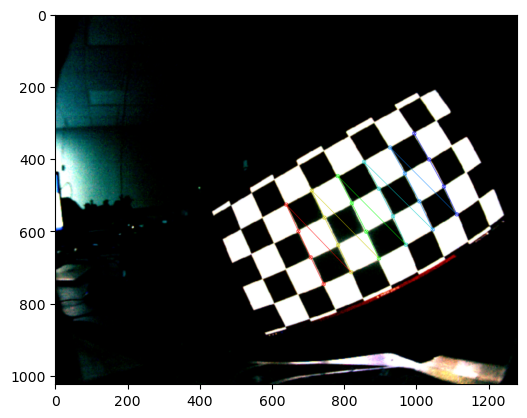

images\4_cR.png
found


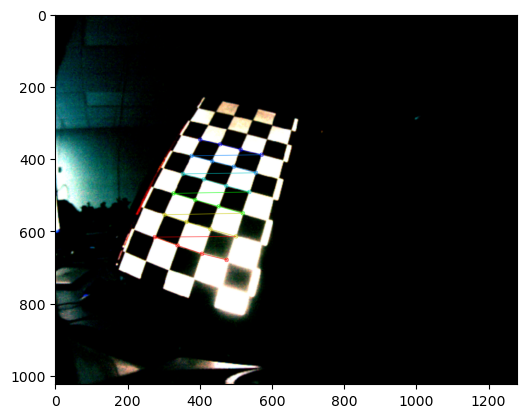

images\5_cR.png
found


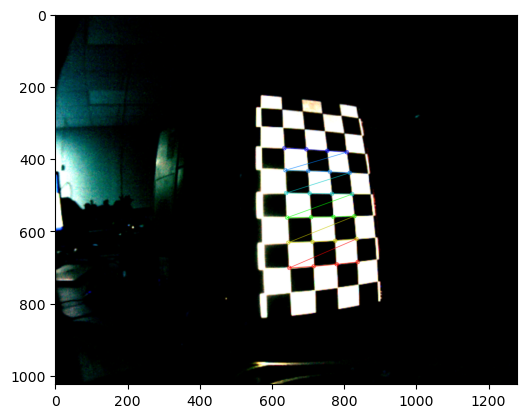

images\6_cR.png
images\7_cR.png
images\8_cR.png
images\9_cR.png


In [174]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
x = 4
y = 6
objp = np.zeros((x*y,3), np.float32)
objp[:,:2] = np.mgrid[0:x,0:y].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('images/*cR.png')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret,thr = cv.threshold(gray,240,255,cv.THRESH_BINARY)
    # Find the chess board corners
#     plt.imshow(thr)
#     plt.pause(1)
    ret, corners = cv.findChessboardCorners(gray, (x,y), flags=cv.CALIB_USE_INTRINSIC_GUESS)
    print(fname)
    # If found, add object points, image points (after refining them)
    if ret == True:
        print('found')
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (x,y), corners2, ret)
        plt.imshow(img)
        plt.pause(1)
cv.destroyAllWindows()

In [169]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

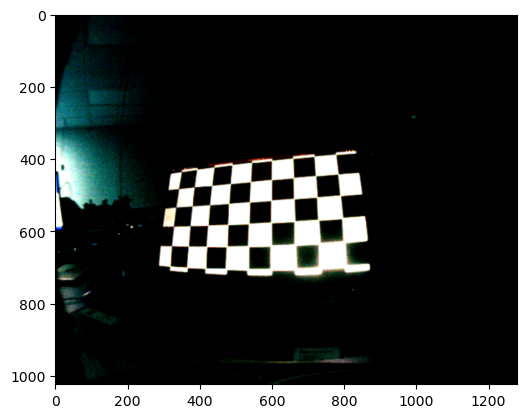

In [170]:
img = cv.imread(images[1])
plt.imshow(img)
h, w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [171]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

True

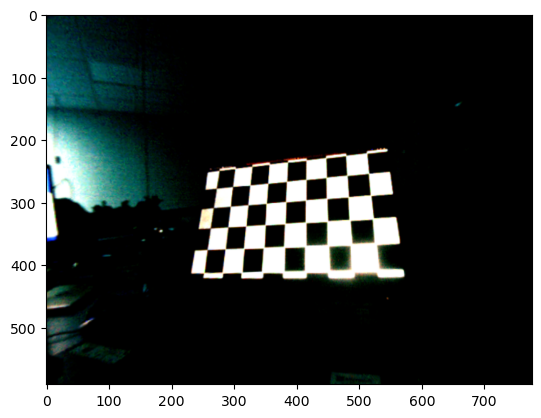

In [172]:
plt.imshow(dst)

In [173]:
mean_error = 0
for i in range(len(objpoints)):
 imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
 error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
 mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.15853036981161367
